# Desafio

### Exercício: Explorando o Conjunto de Dados de Vendas de carros elétricos

**Objetivo:** Utilizar a biblioteca Pandas e Matplotlib para extrair e analisar informações dos conjuntos de dados de vendas de carros elétricos.
link: https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024

Desafios/etapas:
1 - importar a biblioteca pandas no Jupyter
2 - ler o arquivo .csv
3 - apresentar informações básicas do dataset
4 - limpar as linhas que possuirem dados vazios
5 - plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna mode).
6 - plotar um gráfico do tipo "bar" verificando as 10 primeiras regiões em quantidade de veículos.

In [6]:
#importar as bibliotecas
import pandas as pd #biblioteca para trabalhar com o arquivo .csv
import matplotlib.pyplot as plt #biblioteca para trabalhar com gráficos

In [7]:
#Ler o arquivo .csv
df = pd.read_csv('../dataset/IEA Global EV Data 2024.csv')

In [8]:
#Apresentar as 5 primeiras linhas do dataFrame
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [9]:
#Informaçõe gerais
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [10]:
#verificar valores duplicados
df.duplicated().sum() #caso aparecer 0 significa que não tem linhas iguais

0

In [11]:
#verificar valores vazios por coluna
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [12]:
#Pie
df.head()
df['unit'].unique() #tomar cuidado pois 'mode' é uma palavra reservada
#A coluna unit possui valores de unidades diferentes portanto será necessários
#definir a unidada para ser analisada

#A unidade será 'vehicles' portanto é necessário criar um novo dataframe
#com apenas essas linhas
df_vehicles = df.loc[df['unit'] == 'Vehicles']

In [13]:
df_vehicles['unit'].unique() #verifico os tipos únicos da coluna 'unit'


array(['Vehicles'], dtype=object)

([<matplotlib.patches.Wedge at 0x20decdf44d0>,
 [Text(0.2236940701869681, 1.0770148387850504, 'Cars'),
  Text(-1.059475175108288, -0.29582486935560853, 'Buses'),
  Text(0.05351735479744666, -1.0986973617586802, 'Vans'),
  Text(1.0005952318392295, -0.45695643339447445, 'Trucks')],
 [Text(0.12201494737470986, 0.5874626393373001, '43.5%'),
  Text(-0.5778955500590661, -0.1613590196485137, '21.7%'),
  Text(0.0291912844349709, -0.5992894700501892, '21.2%'),
  Text(0.5457792173668524, -0.2492489636697133, '13.6%')])

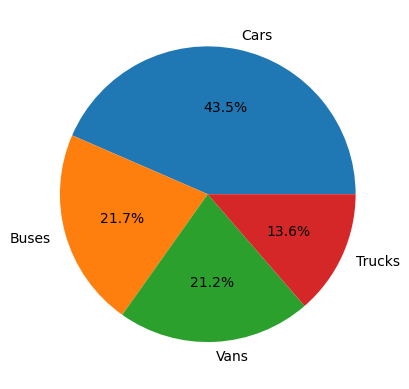

In [14]:
#gráfico pie(torta)
etiquetas = df_vehicles['mode'].unique()  #verifico os tipos únicos da coluna 'mode'
valores_etiquetas = df_vehicles['mode'].value_counts()
plt.pie(valores_etiquetas, labels=etiquetas, autopct='%1.1f%%')

In [15]:
df_vehicles.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


In [39]:
#Quando se agrupa o dataframe por região e somando a coluna 'value' existe uma transformação do dataframe
#para dicionário.
dictionary_vehicles = df_vehicles.groupby('region')['value'].sum()
#dictionary_vehicles.keys()
dictionary_vehicles.Australia

578832.0

<BarContainer object of 10 artists>

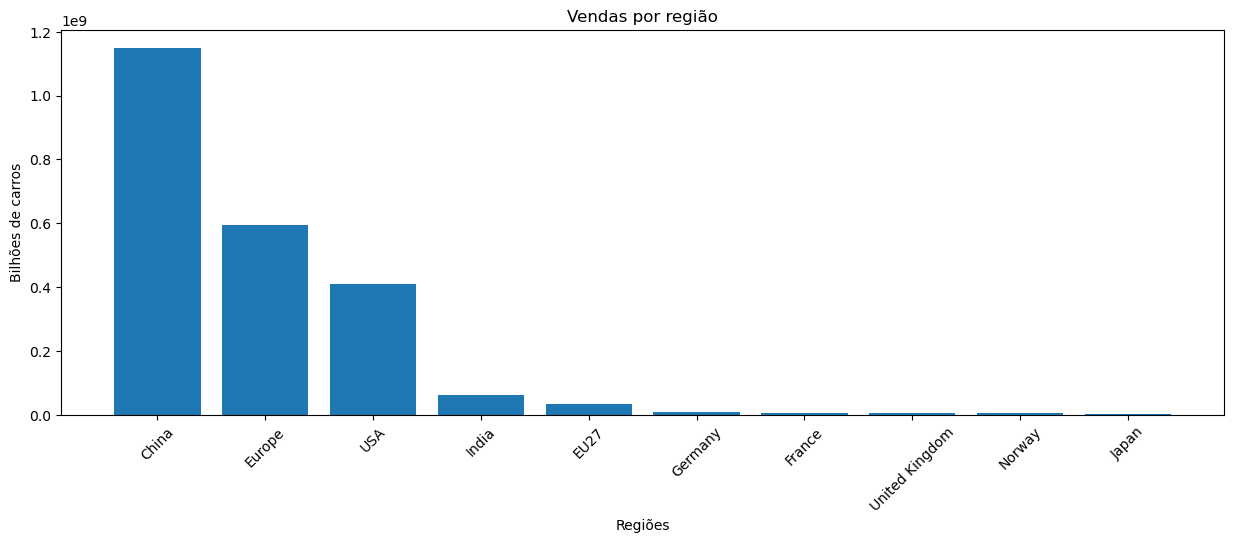

In [115]:
#O tipo de dado dicionário não possui os métodos do dataframe portanto é necessário converte-lo
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regiões', 'Valores'] )

#Filtra o dataframe as linhas que forem diferente de 'World' e 'Rest of the word' para a coluna 'Regiões'. 
#Organiza as linhas em ordem decrescente e apresenta apenas as primeiras 10 linhas
df_top_ten = df_vehicles_region.loc[(df_vehicles_region['Regiões'] != 'World') & 
                        (df_vehicles_region['Regiões'] != 'Rest of the world')] \
                        .sort_values(by=['Valores'], ascending = False) \
                        .head(10)#Decrescente(False)

df_top_ten #dataframe contendo as 10 maiores vendas de veículos em ordem decrescente

x = df_top_ten['Regiões'] #Dados coluna Regiões
y = df_top_ten['Valores'] #Dados coluna Valores
plt.figure(figsize = (15, 5)) #Define o tamanho da figura comprimento por altura
plt.title('Vendas por região') #Titulo gráfico
plt.xlabel('Regiões')#Etiqueta eixo x
plt.ylabel('Bilhões de carros')#Etiqueta eixo y
plt.xticks(rotation=45)#Organiza as etiquetas do eixo x em diagonal
plt.bar(x, y)#Plotagem do gráfico tipo Bar(Barraa)

In [135]:
df_vehicles['powertrain'].unique()

array(['BEV', 'PHEV', 'FCEV'], dtype=object)

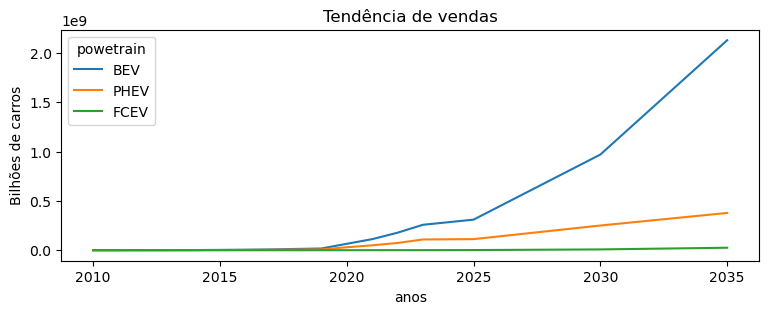

In [171]:
df_BEV = df_vehicles.loc[df_vehicles['powertrain'] == 'BEV']
df_PHEV = df_vehicles.loc[df_vehicles['powertrain'] == 'PHEV']
df_FCEV = df_vehicles.loc[df_vehicles['powertrain'] == 'FCEV']

BEV = df_BEV.groupby('year')['value'].sum()
PHEV = df_PHEV.groupby('year')['value'].sum()
FCEV = df_FCEV.groupby('year')['value'].sum()
plt.figure(figsize = (9, 3)) #Define o tamanho da figura comprimento por altura
plt.title('Tendência de vendas') #Titulo gráfico
plt.xlabel('anos')#Etiqueta eixo x
plt.ylabel('Bilhões de carros')#Etiqueta eixo y
plt.plot(BEV, label='BEV')
plt.plot(PHEV, label='PHEV')
plt.plot(FCEV, label = 'FCEV')
plt.legend(title='powetrain')